## Synthetic brainset 

The goal of this script is to generate some synthetic data and generate from it a `brainset` object for training neurofoundation models. 

In [1]:
%load_ext autoreload
%autoreload 2

### RiaB data generation 

Use `RatInABox` to generate 2 hours of data from 200 synthetic neurons. These neurons have smooth random spatial tuning curves. 

In [1]:
import numpy as np 
import tqdm
import ratinabox 
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent 
from ratinabox.Neurons import RandomSpatialNeurons

# Params 
T = 0.2*60*60  # total time to simulate (s)
DT = 0.01    # simulation time step (s)
N = 100      # number of neurons
MAX_FR = 5  # maximum firing rate (Hz)


env = Environment() # Create environment
agent = Agent( # Create agent
    env,
    params={
        'dt':DT
        }
    )
neurons = RandomSpatialNeurons( # Create neuron population
    agent,
    params={
        'n':N,
        'max_fr':MAX_FR,}
    )

# Simulate for 2 hours 
for _ in tqdm.tqdm(range(int(T/DT))):
    agent.update()
    neurons.update()

100%|██████████| 72000/72000 [00:16<00:00, 4329.17it/s]


## Visualize the data

    • To AUTOMATICALLY save all plots (recommended), set  `ratinabox.autosave_plots = True`
    • To MANUALLY save plots, call                        `ratinabox.utils.save_figure(figure_object, save_title).
      This warning will not be shown again
HINT: You can stylize plots to make them look like repo/paper by calling `ratinabox.stylize_plots()`
      This hint will not be shown again


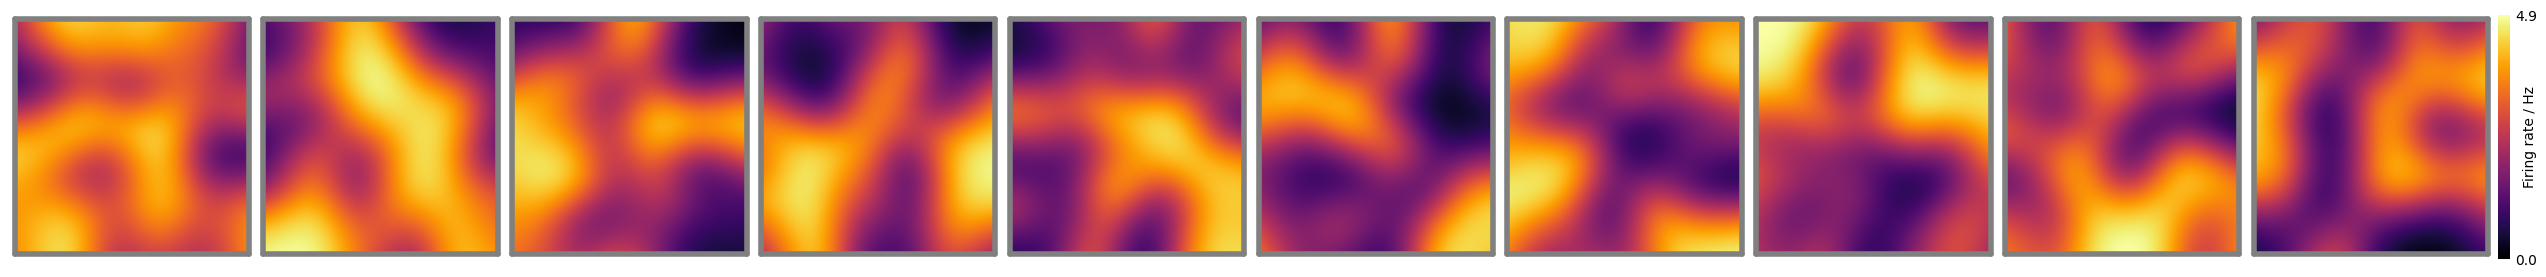

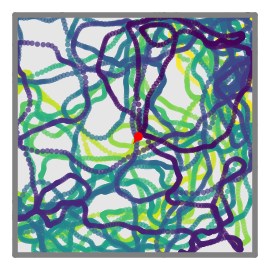

In [2]:
# Plot the receptive fields (10 of them) 
neurons.plot_rate_map(chosen_neurons="10");

# Plot the trajectory (first 5 minutes)
agent.plot_trajectory(t_max=5*60, color='changing');

Now we'll extract the data, and save it in `temporaldata` format. 

In [3]:
spikes = neurons.get_history_arrays()['spikes']  # spike times (s)
pos = agent.get_history_arrays()['pos']      # position (x,y) (cm)
t = neurons.get_history_arrays()['t']   # time vector (s)

spike_times = []
spike_unit_ids = []
for neuron_id in range(spikes.shape[1]):
    neuron_spike_times = t[spikes[:, neuron_id]]
    spike_times.extend(neuron_spike_times)
    spike_unit_ids.extend([neuron_id]*len(neuron_spike_times))
spike_times = np.array(spike_times)
spike_unit_ids = np.array(spike_unit_ids)



In [ ]:
from temporaldata import IrregularTimeSeries, Interval, RegularTimeSeries, Data
from bokeh.plotting import show

from plotting_utils import make_plot

domain = Interval(start = 0, end = agent.t)
spikes = IrregularTimeSeries(
    timestamps=spike_times,
    unit_index=spike_unit_ids,
    domain=domain,
    )
spikes.sort()

cursor = RegularTimeSeries(
    pos=pos,
    sampling_rate=1/DT,
    domain=domain,
    )

data = Data(
    spikes=spikes,
    cursor=cursor,
    domain=domain,
)

p = make_plot(data, add_play_controls=True)
show(p)

Loading BokehJS ...

# Generate OU data